${\large \text{Introduction to fft in Python:}}$

$${\large \hspace{10mm}
\begin{equation}
y(t) = 20\sin(20\pi t) + 7\sin(100 \pi t) + 14\cos(50 \pi t) + 3
\end{equation}
}
$$

${\large \text{The two main frequencies and periods are:}}$

$${\large \hspace{10mm}
\begin{equation}
2\pi f_1 = 20\pi \longrightarrow f_1 = 10 \quad \text{and} \quad T_1 = \frac{1}{f_1} = \frac{1}{10}
\end{equation}
}
$$

$${\large \hspace{10mm}
\begin{equation}
2\pi f_2 = 100\pi \longrightarrow f_2 = 50 \quad \text{and} \quad T_2 = \frac{1}{f_2} = \frac{1}{50}
\end{equation}
}
$$

$${\large \hspace{10mm}
\begin{equation}
2\pi f_3 = 50\pi \longrightarrow f_3 = 25 \quad \text{and} \quad T_3 = \frac{1}{f_3} = \frac{1}{25}
\end{equation}
}
$$

In [1]:
import numpy as np

Nt = 1024
Tend = 1
tinit = np.linspace(0, Tend, Nt + 1)
t = tinit[0:Nt]
y = 20 * np.sin(20 * np.pi * t) + 7 * np.sin(100 * np.pi * t)+ 14 * np.cos(50 * np.pi * t) + 3

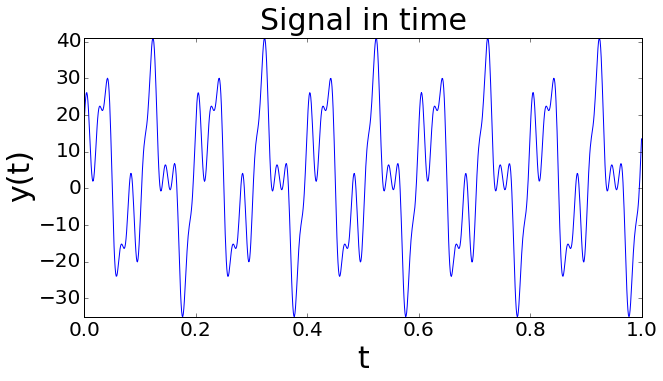

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# Plotting Jazz
import mpld3
%matplotlib inline
mpld3.enable_notebook()
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes(xlim=(0, Tend), ylim=(min(y), max(y)))
ax.plot(t, y)

ax.set_title("Signal in time", fontsize=30, y=1.01)
ax.set_xlabel('t', fontsize=30)
ax.set_ylabel('y(t)', fontsize=30)

plt.show()

${\large \text{Goal $\longrightarrow$ Use $\texttt{fft}$ to find the two main frequencies} }$

$${\large \hspace{10mm}
\begin{equation}
f_1 = 10, \quad f_2 = 50,  \quad \text{and} \quad f_3 = 25
\end{equation}
}
$$

${\large \text{Step 1: producing the $\texttt{fft}(f(t))$} }$


${\large \text{Step 2: Generating the frequency vector $\textbf{f}$:} }$

$ {\large \hspace{10mm} \text{Assuming that}}$

$${\large 0\leq t \leq T}$$

${\large \hspace{10mm} \text{and that the data is sampled at $N_t$ equai-spaced points in time}}$

$${\large \hspace{10mm}
\begin{equation}
n = 0, 1, 2, ..., N_t-1
\end{equation}
}
$$

${\large \hspace{10mm} \text{with the time-step size $dt$}}$
$${\large \hspace{10mm}
\begin{equation}
dt = \frac{T}{N_t},
\end{equation}
}
$$

${\large \hspace{10mm} \text{The frequency vector $\textbf{f}$ follows}}$

$${\large \hspace{10mm}
\begin{equation}
\textbf{f} = f_s*(0, 1, 2, ..., N_t/2-1, -1, -2, ..., -N_t/2),
\end{equation}
}
$$

${\large \hspace{10mm} \text{where}}$
$${\large \hspace{10mm}
\begin{equation}
f_s = \frac{1}{dt}\cdot
\end{equation}
}
$$
${\large \text{Step 3: plotting the $\texttt{fft}(f(t))$ vs $\textbf{f}$}}$

${\large \text{Step 4: Analyzing real, imaginary and absolute parts of the results}}$

${\large \hspace{10mm} \text{The real part gives you the cosines}}$

${\large \hspace{10mm} \text{The imaginary part gives you the sines}}$

${\large \hspace{10mm} \text{The 0 part gives you 2 * constant}}$

In [3]:
from numpy.fft import *

ts = t[1] - t[0]
fs = 1.0 / ts
f = [-i * float(fs) / Nt for i in range(-(Nt/2), Nt/2)]

yf = fftshift(fft(y))

AmpCoeff = Nt/2
      
yfabsScaled = [i/float(AmpCoeff) for i in np.abs(yf)]
yfrealScaled = [i/float(AmpCoeff) for i in np.real(yf)]
yfimagScaled = [i/float(AmpCoeff) for i in np.imag(yf)]

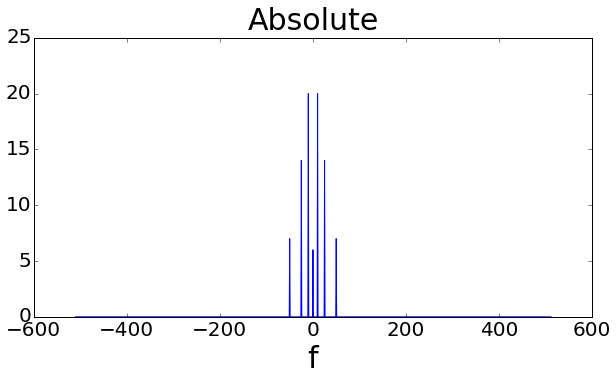

In [4]:
fig02 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes()
ax.plot(f, yfabsScaled)
ax.set_title("Absolute", fontsize=30, y=1.01)
ax.set_xlabel('f', fontsize=30)

plt.show()

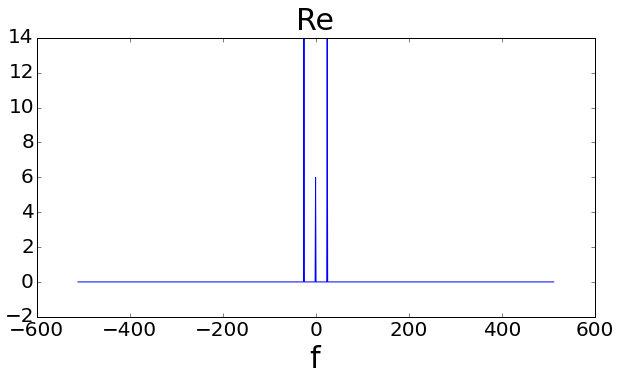

In [5]:
fig03 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes()
ax.plot(f, yfrealScaled)
ax.set_title("Re", fontsize=30, y=1.01)
ax.set_xlabel('f', fontsize=30)

plt.show()

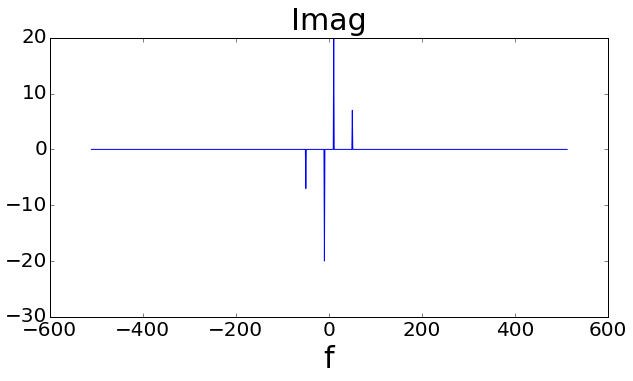

In [6]:
fig03 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes()
ax.plot(f, yfimagScaled)
ax.set_title("Imag", fontsize=30, y=1.01)
ax.set_xlabel('f', fontsize=30)

plt.show()